In [1]:
import tensorflow_datasets as tfds

In [2]:
import numpy as np
import pandas as pd
from os import sep
from scipy import sparse;
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import regex as re
import pandas as pd
import numpy as np

In [3]:
rating_contents = pd.read_csv('./drive/MyDrive/rating_list.csv', sep=',', encoding='utf-8')

In [4]:
rating_contents = rating_contents[['comment', 'rating']]

In [5]:
rating_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569772 entries, 0 to 569771
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  551730 non-null  object
 1   rating   569772 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [6]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [7]:
!pip install underthesea

     |████████████████████████████████| 7.5 MB 4.5 MB/s            
     |████████████████████████████████| 3.4 MB 38.8 MB/s            
     |████████████████████████████████| 235 kB 42.6 MB/s            
     |████████████████████████████████| 43 kB 1.0 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 743 kB 40.6 MB/s            
     |████████████████████████████████| 61 kB 459 kB/s             
     |████████████████████████████████| 3.3 MB 47.8 MB/s            
     |████████████████████████████████| 596 kB 49.0 MB/s            
     |████████████████████████████████| 895 kB 52.7 MB/s            
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=05af6175a5b99355ed20d625fbcd8fcdabd26e3f9f80c3a088e6c92b3b436179
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: PyYAML
    Found existing insta

In [ ]:
from underthesea import word_tokenize

In [ ]:
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [ ]:
rating_contents['comment']

0         Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...
1         sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...
2         sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...
3         tiki làm  việc  tắc  trách,  tôi  mua sữa  yom...
4         Theo mình thấy dùng sưa hộp 1 lit mình thấy ng...
                                ...                        
569767            thái độ nhân viên vs lễ tân ko vui vẻ lắm
569768    Thái độ nhân viên rất tệ. Lâu lâu còn đòi tiền...
569769                                                  NaN
569770    Mình có mua một mã kích hoạt  "khóa học Hacker...
569771                                                  NaN
Name: comment, Length: 569772, dtype: object

In [ ]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()


In [ ]:
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

In [ ]:
nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


In [ ]:
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]

            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
           
        else:
            
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]

    return ''.join(chars)

def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True

def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)



In [ ]:
def text_preprocess(document):
    document = remove_html(document)
    document = convert_unicode(document)
    document = chuan_hoa_dau_cau_tieng_viet(document)
    document = word_tokenize(document, format="text")
    document = document.lower()
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
text_preprocess('Đại học Bách Khoa Hà Nội.')

'đại_học bách_khoa hà_nội'

In [ ]:
stopword = set()
with open('./drive/MyDrive/stop_words.txt', 'r') as fp:
      for line in fp.readlines():
        stopword.add(line.strip())
    

In [ ]:
def remove_stopwords(line):
    words = []
    for word in line.split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [ ]:
def other_2_str(x):
  return str(x)

In [ ]:
rating_contents['comment'] = rating_contents['comment'].apply(other_2_str).apply(remove_stopwords)

In [ ]:
rating_contents['comment'] = rating_contents['comment'].apply(text_preprocess)

In [ ]:
rating_contents.head()

,comment,rating
0,tiki hàng treo đầu dê thịt chó hình_ảnh sản_ph...,1
1,sản_phẩm tuyệt với shipper tuyệt_vời bao shipp...,5
2,sữa 2 mẹ uống 2 hộp ói mữa ngày tiêu tức ngực ...,2
3,tiki tắc_trách mua sữa yomost uống bé ỉa_chảy ...,1
4,theo sưa hộp 1 lit ngon hơn cảm_giác hộp sữa b...,4


In [ ]:
rating_contents.to_csv('./drive/MyDrive/modified_rating_list.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
rating_contents = pd.read_csv('./drive/MyDrive/modified_rating_list.csv', sep=',', encoding='utf-8')

In [ ]:
def removeNumber(line):
  res = ''.join([i for i in line if not i.isdigit()])
  return res

In [ ]:
rating_contents.dropna(subset=['comment'], inplace=True)

In [ ]:
rating_contents['comment'] = rating_contents['comment'].apply(removeNumber)

In [ ]:
contents = rating_contents['comment'].tolist()

In [ ]:
contents = [str(content) for content in contents]

In [ ]:
len(contents)

545689

In [ ]:
train_contents = contents[:500000]
test_contents = contents[500000:]

In [ ]:
val_contents = train_contents[400000:]
train_contents = train_contents[:400000]

In [ ]:
labels = []

In [ ]:
for rating in rating_contents['rating']:
  if (int(rating) <= 3):
    labels.append(0)
  elif (int(rating) == 4):
    labels.append(1)
  else:
    labels.append(2)
 

In [ ]:
ratings = rating_contents['rating'].tolist()

In [ ]:
train_labels = labels[:500000]
test_labels = labels[500000:]


In [ ]:
val_labels = train_labels[400000:]
train_labels = train_labels[:400000]

In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

In [ ]:
np.unique(train_labels)

array([0, 1, 2])

In [ ]:
np.unique(test_labels)

array([0, 1, 2])

In [ ]:
test_labels

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
contents

['tiki hàng treo đầu dê thịt chó hình_ảnh sản_phẩm thùng sữa yomost quà tặng kèm bình nhiệt yomost hạn khuyến_mãi   hàng  hàng  khi hàng bình nhiệt gọi hotline  nhánh _viên tư_vấn nguyễn_vũ thùy anh không quà tặng sau chứng hỉnh ảnh quảng_cáo hình đính kèm dưới nhân_viên nguyễn_vũ thùy anh bộ_phận đóng_gói quyền tách quà tặng sản_phẩm phục_vụ mục_đích khác đề_nghị tiki phản_hồi bất từ bao thương_hiệu tiki nhân_viên quyền cắp quà tặng khuyến_mãi sản_xuất hàng trắng_trợn vậy từ nhân_viên tư_vấn tiki hàng thái_độ hách_dịch coi hay tiki thực treo đầu dê thịt chó sách kinh_doanh ps tôi gửi phản_hồi_trang chăm_sóc hàng tải thông mã đơn hàng tk',
 'sản_phẩm tuyệt với shipper tuyệt_vời bao shipper tâm nghề vậy gọi  ko đc đt chế_độ im_lặng ngủ trưa shipper gửi xe_hàng chốt mượn xe_đạp kiếm nhà gọi hàng cảm_ơn shipper nhìu lam luôn dịch giao hàng dự_kiến luôn  tiki',
 'sữa  mẹ uống  hộp ói mữa ngày tiêu tức ngực chịu uống sữa hàng ngày đợt mua tiki vậy date cũ nữa   hạn ko tiki hàng trách_nhiệm 

In [ ]:
remove_stopwords('mình mua lúc khuyến_mãi được tặng ly rap việt giao hàng thì tiki tách thành  đơn hàng tiki mới giao thùng pepsi thôi còn hàng tặng thì vẫn thấy hi_vọng tiki sẽ giao đúng lịch hẹn')

'mua khuyến_mãi tặng ly rap việt giao hàng tiki tách thành đơn hàng tiki giao thùng pepsi hàng tặng hi_vọng tiki giao lịch hẹn'

In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 500

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>", filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

In [ ]:
tokenizer.fit_on_texts(train_contents)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'hàng': 2,
 'giao': 3,
 'sản_phẩm': 4,
 'mua': 5,
 'đẹp': 6,
 'tiki': 7,
 'ok': 8,
 'ko': 9,
 'giá': 10,
 'tốt': 11,
 'nhanh': 12,
 'chất': 13,
 'đóng_gói': 14,
 'hơi': 15,
 'shop': 16,
 'k': 17,
 'mình': 18,
 'sử_dụng': 19,
 'cẩn_thận': 20,
 'máy': 21,
 'lắm': 22,
 'ngon': 23,
 'sp': 24,
 'ổn': 25,
 'gói': 26,
 'hài': 27,
 'hộp': 28,
 'xài': 29,
 'chắn': 30,
 'hình': 31,
 'mùi': 32,
 'đc': 33,
 'tặng': 34,
 'thơm': 35,
 'rẻ': 36,
 'da': 37,
 'đóng': 38,
 'đi': 39,
 'màu': 40,
 'tiền': 41,
 'được': 42,
 'rất': 43,
 'ủng_hộ': 44,
 'thời_gian': 45,
 'thử': 46,
 'không': 47,
 'hãng': 48,
 'nha': 49,
 'sách': 50,
 'đầu': 51,
 'cảm_ơn': 52,
 'sữa': 53,
 'luôn': 54,
 'rồi': 55,
 'kèm': 56,
 'dùng': 57,
 '️': 58,
 'nhẹ': 59,
 'chất_lượng': 60,
 'nhưng': 61,
 'đánh_giá': 62,
 'lắp': 63,
 'đổi': 64,
 'hôm': 65,
 'hài_lòng': 66,
 'bé': 67,
 'êm': 68,
 'có': 69,
 'uống': 70,
 'to': 71,
 'này': 72,
 'mặt': 73,
 'mô_tả': 74,
 'phù_hợp': 75,
 'quà': 76,
 'bình': 77,
 'nữa': 78,
 'nồi':

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_contents)

In [ ]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_contents)
val_sequences = tokenizer.texts_to_sequences(val_contents)

In [ ]:
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')
padded_val_sequences = pad_sequences(val_sequences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
padded_val_sequences

array([[223,   0,   0, ...,   0,   0,   0],
       [  2,  33,  26, ...,   0,   0,   0],
       [  2,   8, 117, ...,   0,   0,   0],
       ...,
       [  6,  22,   0, ...,   0,   0,   0],
       [ 27,   0,   0, ...,   0,   0,   0],
       [ 24, 360,  31, ...,   0,   0,   0]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(64, activation='relu'))

In [ ]:
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           640000    
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2048064   
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,688,259
Trainable params: 2,688,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
padded_test_sequences.shape

(45689, 500)

In [ ]:
test_labels

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
padded_test_sequences

array([[ 24,   6,   0, ...,   0,   0,   0],
       [  6,   0,   0, ...,   0,   0,   0],
       [  8,   0,   0, ...,   0,   0,   0],
       ...,
       [744, 125, 284, ...,   0,   0,   0],
       [744, 125, 160, ...,   0,   0,   0],
       [ 18,   5, 313, ...,   0,   0,   0]], dtype=int32)

In [ ]:
from keras.utils import np_utils
train_l = np_utils.to_categorical(train_labels,3)
test_l = np_utils.to_categorical(test_labels, 3)
val_l = np_utils.to_categorical(val_labels, 3)

In [ ]:
train_l

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", patience=5)

In [ ]:
padded_train_sequences.shape

(400000, 500)

In [ ]:
train_l.shape

(400000, 3)

In [ ]:
padded_val_sequences.shape

(100000, 500)

In [ ]:
model.fit(padded_train_sequences, train_l, epochs=100, batch_size=128, validation_data=(padded_val_sequences, val_l), callbacks=[callback])


Epoch 1/100
   1/3125 [..............................] - ETA: 7:18 - loss: 1.0864 - acc: 0.6016

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


3125/3125 [==============================] - 284s 91ms/step - loss: 0.6011 - acc: 0.7722 - val_loss: 0.5839 - val_acc: 0.7758
Epoch 2/100
3125/3125 [==============================] - 283s 91ms/step - loss: 0.5525 - acc: 0.7899 - val_loss: 0.5858 - val_acc: 0.7746
Epoch 3/100
3125/3125 [==============================] - 289s 92ms/step - loss: 0.5191 - acc: 0.8022 - val_loss: 0.5958 - val_acc: 0.7729
Epoch 4/100
3125/3125 [==============================] - 281s 90ms/step - loss: 0.4754 - acc: 0.8200 - val_loss: 0.6273 - val_acc: 0.7676
Epoch 5/100
3125/3125 [==============================] - 287s 92ms/step - loss: 0.4336 - acc: 0.8385 - val_loss: 0.6844 - val_acc: 0.7563
Epoch 6/100
3125/3125 [==============================] - 280s 90ms/step - loss: 0.4014 - acc: 0.8519 - val_loss: 0.7440 - val_acc: 0.7458


In [ ]:
test_predicted = model.predict(padded_test_sequences)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
test_predicted

array([[6.4147511e-03, 1.0612990e-01, 8.8745534e-01],
       [9.0101715e-03, 1.3956369e-01, 8.5142612e-01],
       [1.2350226e-02, 2.3779868e-01, 7.4985105e-01],
       ...,
       [5.5777580e-01, 3.8060048e-01, 6.1623648e-02],
       [2.1397208e-01, 4.8019478e-01, 3.0583316e-01],
       [1.0000000e+00, 2.3052211e-11, 2.0670197e-09]], dtype=float32)

In [ ]:
predicted_labels = []

In [ ]:

for result_one_hot_predicted in test_predicted:
  rating_predicted = np.argmax(result_one_hot_predicted)
  predicted_labels.append(rating_predicted)


In [ ]:
predicted_labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,


In [ ]:
test_labels

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
len(test_labels)

45689

In [ ]:
import seaborn as sns

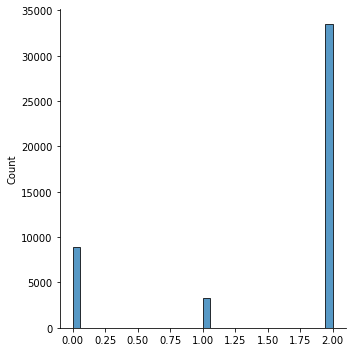

In [ ]:
sns.displot(predicted_labels, )

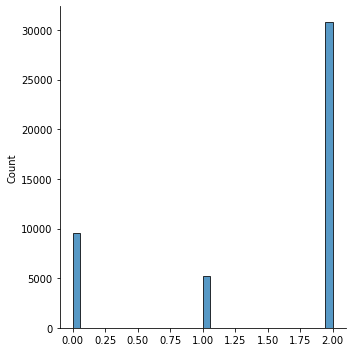

In [ ]:
sns.displot(test_labels, )

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(test_labels, predicted_labels))

accuracy =  0.7838648252314562


In [ ]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 
cnf_matrix = my_confusion_matrix(test_labels, predicted_labels)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[ 6584.   962.  2047.]
 [ 1008.  1033.  3223.]
 [ 1306.  1329. 28197.]]

Accuracy: 0.7838648252314562


In [ ]:
def cm2pr_binary(cm):
    p0 = cm[0,0]/np.sum(cm[:,0])
    p1 = cm[1,1]/np.sum(cm[:,1])
    p2 = cm[2,2]/np.sum(cm[:,2])
    r0 = cm[0,0]/np.sum(cm[0])
    r1 = cm[1,1]/np.sum(cm[1])
    r2 = cm[2,2]/np.sum(cm[2])
    return (p0, p1, p2, r0, r1, r2)

cm = np.array(cnf_matrix)
p0, p1, p2, r0, r1, r2 = cm2pr_binary(cm)
print("precition_0 = {0:.2f}, recall_0 = {1:.2f}".format(p0, r0))
print("precition_1 = {0:.2f}, recall_1 = {1:.2f}".format(p1, r1))
print("precition_2 = {0:.2f}, recall_2 = {1:.2f}".format(p2, r2))

precition_0 = 0.74, recall_0 = 0.69
precition_1 = 0.31, recall_1 = 0.20
precition_2 = 0.84, recall_2 = 0.91


In [ ]:
embedding_layer = model.layers[0]

In [ ]:
weights = embedding_layer.get_weights()[0]

In [ ]:
weights

array([[ 0.00395547, -0.00172608, -0.00116967, ...,  0.02748317,
        -0.00344449, -0.0037158 ],
       [-0.10086219,  0.20942444, -0.02571134, ..., -0.03456049,
         0.02664201, -0.05806713],
       [-0.03368295,  0.03246678,  0.02083907, ..., -0.13913663,
        -0.01371646,  0.00043594],
       ...,
       [-0.25529858,  0.1628487 ,  0.05936928, ...,  0.3951946 ,
         0.13984308, -0.03693747],
       [-0.2460008 , -0.03668511,  0.41493708, ...,  0.40042892,
         0.25896913,  0.20725504],
       [-0.24493563,  0.09344178,  0.14783694, ..., -0.04010542,
        -0.01440161, -0.05968579]], dtype=float32)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for idx in range(1, vocab_size):
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(vi) for vi in vector]) + "\n")

out_m.close()
out_v.close()

In [ ]:
model_json = model.to_json()

In [ ]:
with open("./drive/MyDrive/model.json", "w") as json_file:
  json_file.write(model_json)

In [ ]:
model.save_weights("./drive/MyDrive/model.h5")

In [ ]:
json_file = open('./drive/MyDrive/model.json', 'r')

In [ ]:
loaded_model_json = json_file.read()

In [ ]:
json_file.close()

In [ ]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.load_weights('./drive/MyDrive/model.h5')

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           640000    
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2048064   
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,688,259
Trainable params: 2,688,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
con = "Không hài lòng"
con = remove_stopwords(con)
con = text_preprocess(con)
test_cons = [con]
test_seq = tokenizer.texts_to_sequences(test_cons)
padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post') 

result_one_hot_predicted = model.predict(padded_test_seq)
print(np.amax(result_one_hot_predicted))

rating_predicted = np.argmax(result_one_hot_predicted)
rating_predicted

0.75480163


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0

In [ ]:
# def suggest_movie_by_ratings(con):
#   test_cons = [con]
#   test_cons = [remove_stop_words(con) for con in test_cons]
#   test_seq = tokenizer.texts_to_sequences(test_cons)
#   padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post') 
#   result_one_hot_predicted = model.predict(padded_test_seq)
#   rating_predicted = np.argmax(result_one_hot_predicted)
#   if (rating_predicted >= 2):
#     return True
#   return False


In [ ]:
#!pip install emot

In [ ]:
#import re
#import emot

In [ ]:
#emot.core.emot() 

In [ ]:
# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)